In [4]:
import jsonlines
from matplotlib import pyplot as plt

In [5]:
rougeL_result = []

with jsonlines.open("./result/rougeL_result.jsonl") as file:
    for line in file:
        rougeL_result.append(line)

rougeL_result[:3]

[{'id': 119,
  'fr': '– Voilà les étudiants !',
  'label': "'Ha! the schoolboys.'",
  'pred': '- Here you go, students!',
  'rougeL': 0.0},
 {'id': 140,
  'fr': '– Le grand Meaulnes ! le grand Meaulnes !',
  'label': "'Admiral Meaulnes! Admiral Meaulnesl'",
  'pred': '"The great Meulnes! the great Meulnes!',
  'rougeL': 0.0},
 {'id': 143,
  'fr': '– Fromentin !',
  'label': "'Fromentin !'",
  'pred': '- Frommentin!',
  'rougeL': 0.0}]

In [6]:
for line in rougeL_result:
    line["fr_len"] = len(line["fr"])

all_fr_len = [x["fr_len"] for x in rougeL_result]

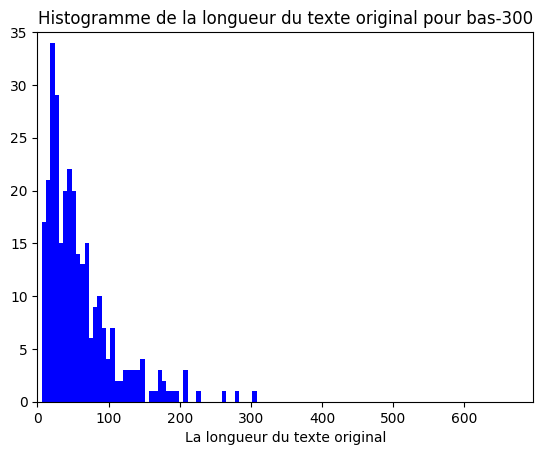

In [14]:
low_300 = rougeL_result[:300]
low_300 = sorted(low_300, key=lambda x:x["fr_len"])
low_fr_len = [x["fr_len"] for x in low_300]

plt.hist(low_fr_len,bins=50,color="blue")
plt.title("Histogramme de la longueur du texte original pour bas-300")
plt.xlabel("La longueur du texte original")
plt.xlim(0,max(all_fr_len))
plt.ylim(0,35)
plt.savefig("./low-300.png",dpi=300)

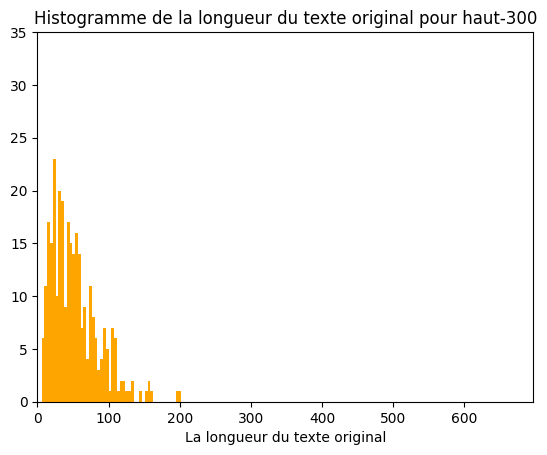

In [15]:
top_300 = rougeL_result[-300:]

top_300 = sorted(top_300, key=lambda x:x["fr_len"])
top_fr_len = [x["fr_len"] for x in top_300]

plt.hist(top_fr_len,bins=50,color="orange")
plt.title("Histogramme de la longueur du texte original pour haut-300")
plt.xlabel("La longueur du texte original")
plt.xlim(0,max(all_fr_len))
plt.ylim(0,35)
plt.savefig("./high-300.png",dpi=300)

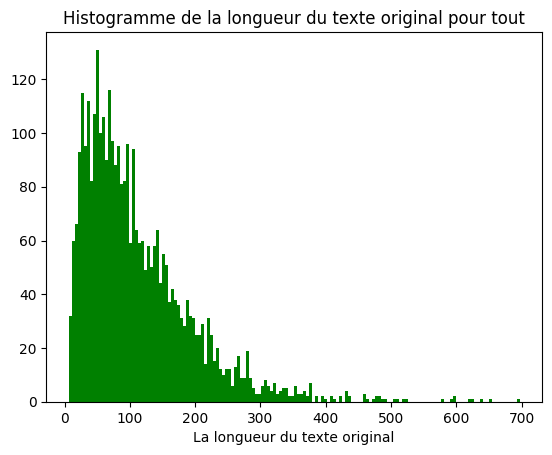

In [16]:
plt.hist(all_fr_len,bins=150,color="green")
plt.title("Histogramme de la longueur du texte original pour tout")
plt.xlabel("La longueur du texte original")
plt.savefig("./all-fr.png",dpi=300)

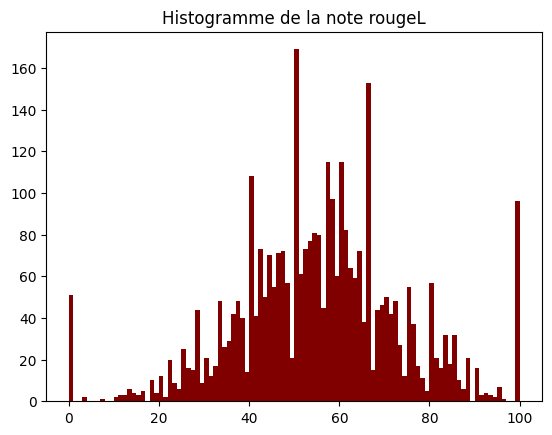

In [17]:
all_rouge_score = [x["rougeL"] for x in rougeL_result]
plt.hist(all_rouge_score, bins=100, color="maroon")
plt.title("Histogramme de la note rougeL")
plt.savefig("./rougeL.png",dpi=300)

In [11]:
from datasets import load_dataset

raw = load_dataset("/home/maxime/Documents/LUMIA/Project/transformers-translation/opus_books","en-fr",split="train")
the_wanderer_data = raw[0:3362]["translation"]

/home/maxime/anaconda3/envs/adapt-ralm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
def print_with_limit(text, max_chars_per_line):
    for i in range(0, len(text), max_chars_per_line):
        print(text[i:i+max_chars_per_line]+"-")

def print_context(id):
    begin = max(0,id-3)
    end = min(3361,id+3)
    
    english_context = ""
    french_context = ""
    for i in range(begin,end+1):
        if i==id:
            english_context += "### "
            french_context += "### "
        english_context += the_wanderer_data[i]["en"] + " "
        french_context += the_wanderer_data[i]["fr"] + " "
        if i==id:
            english_context += "### "
            french_context += "### "
    
    cur_sentence = None 
    for line in rougeL_result:
        if line["id"]==id:
            cur_sentence = line 
            break
    
    print(f"English Context:")
    print_with_limit(english_context, 100)
    print("--------------------------------------------")
    print(f"French Context:")
    print_with_limit(french_context, 100)
    print("--------------------------------------------")
    print(f"Current Sentence Information:")
    print(f'fr: {cur_sentence["fr"]}')
    print(f'en: {cur_sentence["label"]}')
    print(f'translation: {cur_sentence["pred"]}')
    print(f'rougeL: {cur_sentence["rougeL"]}')

In [31]:
def print_tcolorbox(id, example_id=1):
    begin = max(0,id-3)
    end = min(3361,id+3)
    
    english_context = ""
    french_context = ""
    for i in range(begin,end+1):
        if i==id:
            english_context += "\\textbf{"
            french_context += "\\textbf{"
        english_context += the_wanderer_data[i]["en"] + " "
        french_context += the_wanderer_data[i]["fr"] + " "
        if i==id:
            english_context += "}"
            french_context += "}"
    
    cur_sentence = None 
    for line in rougeL_result:
        if line["id"]==id:
            cur_sentence = line 
            break
    
    print('\\example')
    print(f'{{Exemple {example_id}}}')
    print(f'{{{english_context}}}')
    print(f'{{{french_context}}}')
    print(f'{{{cur_sentence["fr"]}}}')
    print(f'{{{cur_sentence["label"]}}}')
    print(f'{{{cur_sentence["pred"]}}}')
    print(f'{{{cur_sentence["rougeL"]}}}')


In [13]:
# Case Study: Low rouge score, Long original text

low_300[-20:]

[{'id': 230,
  'fr': '… Deux petits traits noirs, qui dépassaient le mur de La Belle-Étoile et qui devaient être les deux brancards dressés d’une voiture, ont disparu.',
  'label': '. . . Two little black streaks showing over the top of the wall at the Fair Star, certainly the upturned shafts of a cart, have now disappeared.',
  'pred': '... Two small black lines, which crossed the wall of La Belle-Étoile and which were to be the two uplifted stretchers of a car, disappeared.',
  'rougeL': 32.0,
  'fr_len': 145},
 {'id': 1022,
  'fr': 'Un coup de vent fit battre la porte de l’arrière-chambre qui communiquait avec la sienne et dont la fenêtre donnait aussi sur la cour aux voitures.',
  'label': 'A gust of wind banged the door of the dressing-room adjoining his, which also looked on the stable-yard.',
  'pred': 'A blow of wind made the back-room door that communicated with hers and whose window also gave the courtyard to the cars.',
  'rougeL': 32.5581,
  'fr_len': 147},
 {'id': 2367,
  

In [35]:
for i, line in enumerate(top_300[-10:]):
    print_tcolorbox(line['id'],i+1)
    print('\n')

\example
{Exemple 1}
{Mlle, de Galais had stood up, suddenly growing very pale. And at that precise moment, it came back to my mind that one day, at the mysterious manor, by the side of the lake, Meaulnes had told her his name . . . When she held out her hand to me at the moment of leaving, there was between us, more clearly than if we had spoken many words, a secret understanding which death alone was to break, and a friendship more moving than a great passion. \textbf{... At four o'clock next morning, Firmin knocked at the door of the little room which I occupied in the guinea-fowls' yard. }It was still night and I had great trouble in finding my belongings on the table, amongst the brass candlesticks and the brand-new statuettes of saints which had been chosen out of the shop to decorate my dwelling on the day before my arrival. In the yard, I heard Firmin pumping up my bicycle tyres, and in the kitchen Aunt Julie using the bellows to make up the fire. The sun was hardly risen when 

In [59]:
# Case Study: High rouge score, Long original text

top_300[-20:]

[{'id': 2074,
  'fr': '– Venez dans la « salle à manger », vous serez en paix », nous dit ma tante en poussant la porte de la cuisine.',
  'label': '\'Come in the "dining-room," you will be in peace,\' said my aunt, as she pushed open the kitchen door.',
  'pred': '"Come into the "dining room", you will be at peace," said my aunt, pushing the kitchen door.',
  'rougeL': 81.0811,
  'fr_len': 111},
 {'id': 780,
  'fr': 'Une lourde porte de bois, arrondie dans le haut et cloutée comme une porte de presbytère, était à demi ouverte.',
  'label': 'A heavy wooden door, rounded at the top and studded with nails like a church door, was half open.',
  'pred': 'A heavy wooden door, rounded in the top and nailed like a presbytery door, was half open.',
  'rougeL': 83.3333,
  'fr_len': 111},
 {'id': 2616,
  'fr': '– Vous reviendrez ici dans un an exactement, à cette même heure : vous trouverez la jeune fille que vous aimez.',
  'label': "'You will come back here in exactly a year from today, at thi

In [68]:
# Erreur Émotionnelle

print_context(2236)

English Context:
However, I gaily related to him how I had come, where I had spent the night, and that I was very sur-
prised to see Madame Meaulnes preparing for her son's departure. 'Ah! so she's told you? . . .' he a-
sked. 'Yes. ### You're not going far, I hope?' ### 'Yes, very far.' Out of countenance for a moment,-
 I no longer dared to say nytahing and did not know where to begin with my message, for I felt that -
presently, by a mere word, I was going to wipe out this decision which I did not understand. But he -
himself spoke at last like some one who wishes to justify himself. -
--------------------------------------------
French Context:
Cependant, je lui racontais avec gaieté comment j’étais venu, où j’avais passé la nuit et que j’avai-
s été bien surpris de voir Mme Meaulnes préparer le départ de son fils… – Ah ! elle t’a dit ?… deman-
da-t-il. – Oui. ### Ce n’est pas, je pense, pour un long voyage ? ### – Si, un très long voyage. Un -
instant décontenancé, sentant que j’a

In [36]:
print_tcolorbox(2236)

\example
{Exemple 1}
{However, I gaily related to him how I had come, where I had spent the night, and that I was very surprised to see Madame Meaulnes preparing for her son's departure. 'Ah! so she's told you? . . .' he asked. 'Yes. \textbf{You're not going far, I hope?' }'Yes, very far.' Out of countenance for a moment, I no longer dared to say nytahing and did not know where to begin with my message, for I felt that presently, by a mere word, I was going to wipe out this decision which I did not understand. But he himself spoke at last like some one who wishes to justify himself. }
{Cependant, je lui racontais avec gaieté comment j’étais venu, où j’avais passé la nuit et que j’avais été bien surpris de voir Mme Meaulnes préparer le départ de son fils… – Ah ! elle t’a dit ?… demanda-t-il. – Oui. \textbf{Ce n’est pas, je pense, pour un long voyage ? }– Si, un très long voyage. Un instant décontenancé, sentant que j’allais tout à l’heure, d’un mot, réduire à néant cette décision que je

In [28]:
print_tcolorbox(2236)

\example
{Exemple}
{However, I gaily related to him how I had come, where I had spent the night, and that I was very surprised to see Madame Meaulnes preparing for her son's departure. 'Ah! so she's told you? . . .' he asked. 'Yes. \textbf{You're not going far, I hope?' }'Yes, very far.' Out of countenance for a moment, I no longer dared to say nytahing and did not know where to begin with my message, for I felt that presently, by a mere word, I was going to wipe out this decision which I did not understand. But he himself spoke at last like some one who wishes to justify himself. }
{Cependant, je lui racontais avec gaieté comment j’étais venu, où j’avais passé la nuit et que j’avais été bien surpris de voir Mme Meaulnes préparer le départ de son fils… – Ah ! elle t’a dit ?… demanda-t-il. – Oui. \textbf{Ce n’est pas, je pense, pour un long voyage ? }– Si, un très long voyage. Un instant décontenancé, sentant que j’allais tout à l’heure, d’un mot, réduire à néant cette décision que je n

In [37]:
print_tcolorbox(442)

\example
{Exemple 1}
{'Well, go back to bed. I promise not to go without you.' And he again began to pace to and fro in the room. \textbf{I dared say nothing more. }He kept walking, stopping and then setting off again more quickly like a man in search of memories which he sorts out, challenges and compares, ponders on, thinks he has discovered, and then the thread breaking the search begins once more . .. That was not the only night on which, awakened by the sound of his steps, I found him thus, about one in the morning, treading the attic and lumber-rooms, as do sailors who cannot lose the habit of pacing the deck on night watch and who, in the quiet of their Breton holding, get up and dress of a night, at the regulation hour, to keep a land watch. Two or three times, during the month of January and the first fortnight of February, I was roused out of my sleep in that way. }
{Allons, recouche-toi. Je te promets de ne pas repartir sans toi. Et il reprit sa promenade de long en large da

In [38]:
print_tcolorbox(3274)

\example
{Exemple 1}
{From disgust or for fun, to avenge his love or to destroy it, Meaulnes followed them slowly on his bicycle, and one of them, a wretched girl whose thin yellow hair was held up at the back in a false chignon, gave him a rendezvous for six o'clock in the Garden of the Archbishop's Palace-the very garden in which Frantz in one of his letters had arranged to meet poor Valentine. He did not say no, realising that he would have left the town far behind by that time. And she stopped a long while at her low window over the sloping street, making vague signs to him. \textbf{He hurried to regain the road. }Before leaving, he could not resist the mournful wish to pass for the last time before Valentine's house. He gazed at it and was able to gather food for sorrow. It was one of the last houses in the suburb and the street became a road from that place . . . In front a sort of empty plot made something like a little square. }
{Par dégoût ou par jeu, pour se venger de son amo

In [39]:
print_tcolorbox(1593)

\example
{Exemple 1}
{One hand over his eyes, he scanned the neighbourhood hoping our people had only just started. But what could be done? The tracks of a dozen vehicles were all mixed up on the square and then effaced on the hard road. \textbf{We were stuck there, powerless. }And as we were coming back across the village where the life of a Thursday morning was beginning, four mounted policemen, warned the evening before by Delouche, arrived at a gallop on the square and scattered in the by-streets to block all issues, exactly as a patrol of dragoons sent to reconnoitre a village . . . But it was too late. Booby, the chicken-snatcher, had escaped with his companion. The policemen found nobody, neither Booby himself nor the fellows who had loaded the carts with the birds he had strangled. }
{Il mit sa main au-dessus de ses yeux, espérant un instant que nos gens venaient seulement de partir. Mais que faire ? Dix traces de voitures s’embrouillaient sur la place, puis s’effaçaient sur la

In [40]:
# Mot Polysémique

print_tcolorbox(2670)

\example
{Exemple 1}
{From the edge of the wood we saw him first close with some hesitation one of the shutters, then look vaguely our way, close another, and suddenly run off at full speed in our direction. He reached us before we could think of better concealment. He noticed us as he was going to jump over a small hedge recently planted and enclosing a meadow. \textbf{He changed his course. }I recall that he looked haggard, like a hunted beast. . . He attempted to retrace his steps and climb over the hedge on the side of the brook. I called him : 'Meaulnes ! . . . Augustin ! . . .' But he never even turned his head. }
{Nous le vîmes, de la lisière du bois, fermer d’abord avec hésitation un volet, puis regarder vaguement vers nous, en fermer un autre, et soudain s’enfuir à toutes jambes dans notre direction. Il arriva près de nous avant que nous eussions pu songer à nous dissimuler davantage. Il nous aperçut, comme il allait franchir une petite haie récemment plantée et qui formait la

In [41]:
# Giving more context doesn't help
# 'Friday night. – I thought I\'d write in the sequel "I didn\'t see him again." And everything would have been over. But on arriving tonight, at four o\'clock, at the corner of the theater: here it is. Fine and serious, dressed in black, but with powder in the face and a collar that gives him the appearance of a guilty pierrot. An air at the same time painful and malicious.'

print_tcolorbox(3114)

\example
{Exemple 1}
{'Friday evening. I had thought to write, "I have not seen her again." And everything would have been finished. 'But when I reached the corner of the theatre at four o'clock - there she was 1 Slight and solemn, wearing black, but with powder on her face and a little collar which made her look like a naughty Pierrot. \textbf{A look at once doleful and malicious. }'She comes to tell me that she wants to leave me at once, that she will never come any more .. . 'And yet at nightfall here we still are, the two of us, slowly walking, one close to the other, on the gravel path of the Tuileries. She tells me her story, but tells it in so involved a manner that I understand it badly. }
{Vendredi soir. – J’avais pensé écrire à la suite « Je ne l’ai pas revue. » Et tout aurait été fini. Mais en arrivant ce soir, à quatre heures, au coin du théâtre : la voici. Fine et grave, vêtue de noir, mais avec de la poudre au visage et une collerette qui lui donne l’air d’un pierrot coup

In [76]:
# Interpreter's preference

print_context(2601)

English Context:
And he does not answer my call. Hasn't he got his love back? Why can't he think of me? ### He must b-
egin to think of me. ### Yvonne will let him go . . . She's never refused me anything.' He turned to-
wards me a face where tears had traced dirty streaks in dust and grime, the face of an old-looking c-
hild, worn-out and beaten. His eyes were circled with freckles, his chin badly shaved; his hair, too-
 long, trailed over his dirty collar; with hands in his pockets he stood shivering. -
--------------------------------------------
French Context:
Et voici qu’il ne répond plus. Il a retrouvé son amour, lui. Pourquoi, maintenant, ne pense-t-il pas-
 à moi ? ### Il faut qu’il se mette en route. ### Yvonne le laissera bien partir… Elle ne m’a jamais-
 rien refusé. Il me montrait un visage où, dans la poussière et la boue, les larmes avaient tracé de-
s sillons sales, un visage de vieux gamin épuisé et battu. Ses yeux étaient cernés de taches de rous-
seur son menton, mal

In [50]:
print_tcolorbox(2186)

\example
{Exemple 1}
{All this is true, I should think. Since then, dear Valentine has written far less often. . .' It was not a ghost story Aunt Moinel was relating in her thin piercing voice, so well fitted for such stories. \textbf{Yet I was feeling utterly wretched. }For we had sworn to Frantz, the bohemian, always to help him as brothers, and now the chance had come . . . But was it the moment to spoil the joy I was to bring to Meaulnes the next morning, by telling him what I had just learned? What would be the good of putting him on such an impossible job ? }
{Tout cela doit être vrai, je pense. Depuis ce temps ma Valentine écrit bien moins souvent… Ce n’était pas une histoire de revenants que racontait la tante Moinel de sa petite voix stridente si bien faite pour les raconter. \textbf{J’étais cependant au comble du malaise. }C’est que nous avions juré à Frantz le bohémien de le servir comme des frères et voici que l’occasion m’en était donnée… Or, était-ce le moment de gâter la

In [51]:
print_tcolorbox(2664)

\example
{Exemple 1}
{I often wondered and only came to know when it was too late. Unknown remorse? Inexplicable misgivings? \textbf{Fear of seeing this unheard-of happiness, to which he clung so closely, soon vanish from between his hands? }And then the terrible temptation at once and for ever to dash to the ground this marvel he had conquered? . . . He went out slowly and silently after having once more looked at his young wife. From the edge of the wood we saw him first close with some hesitation one of the shutters, then look vaguely our way, close another, and suddenly run off at full speed in our direction. }
{Je me le suis souvent demandé et je ne l’ai su que lorsqu’il fut trop tard. Remords ignorés ? Regrets inexplicables ? \textbf{Peur de voir s’évanouir bientôt entre ses mains ce bonheur inouï qu’il tenait si serré ? }Et alors tentation terrible de jeter irrémédiablement à terre, tout de suite, cette merveille qu’il avait conquise ? Il sortit lentement, silencieusement, après

In [87]:
print_context(813)

English Context:
Scattered about along the tables were some old men with side whiskers and others clean-shaven, who m-
ight have been old sailors. Dining near them other old men looked very much like the first: the same-
 tanned faces, the same sharp eyes under bushy eyebrows, the same narrow ties like shoestrings. But -
it was easy to see that these had never voyaged farther than the other end of the parish, and if the-
y had been tossed and beaten by winds and storms it had occurred on that rough yet undangerous voyag-
e in cutting the furrow to the field end and guiding back the plough. Few women were to be seen; onl-
y some old peasants with round faces as wrinkled as apples under their goffered caps. With every one-
 of these guests Meaulnes felt confident and at ease. ### Later he came to explain that feeling by s-
aying: If you have ever done something unpardonable you sometimes think, in the midst of much bitter-
ness : 'Yet there are people in the world who would forgive me.' 

In [47]:
# Fluency 

print_tcolorbox(1063)

\example
{Exemple 1}
{'We are leaving,' he said. 'It's been decided very suddenly. At five o'clock we found ourselves quite alone, all the guests together. \textbf{We had waited as long as we possibly could. }Too late for the lovers to turn up. Somebody said, "Let's go". . . And everybody made ready to leave.' Meaulnes made no reply. }
{– Nous partons, répondit-il. Cela s’est décidé tout d’un coup. À cinq heures, nous nous sommes trouvés seuls, tous les invités ensemble. \textbf{Nous avions attendu jusqu’à la dernière limite. }Les fiancés ne pouvaient plus venir. Quelqu’un a dit : si nous partions… Et tout le monde s’est apprêté pour le départ. Meaulnes ne répondit pas. }
{Nous avions attendu jusqu’à la dernière limite.}
{We had waited as long as we possibly could.}
{We waited until the last limit.}
{26.6667}


In [77]:
print_context(2548)

English Context:
Hou-ou ! This time I have heard. It is a signal - a call on two notes, high and low - which I once h-
eard of old . . . Ah! ### I remember: it is the cry of the tall comedian as he hailed his young comp-
anion from the school gate. It is the call to which Frantz made us swear to answer no matter where o-
r when it came. ### But what can he be wanting here to-day, that fellow? 'It comes from the big fir -
wood on the left,' I say in half whispers. 'Most likely a poacher.' -
--------------------------------------------
French Context:
– Hou-ou ! Cette fois, j’ai entendu. C’est un signal, un appel sur deux notes, haute et basse, que j-
’ai déjà entendu jadis… Ah ! je me souviens : c’est le cri du grand comédien lorsqu’il hélait son je-
une compagnon à la grille de l’école. ### C’est l’appel à quoi Frantz nous avait fait jurer de nous -
rendre, n’importe où et n’importe quand. ### Mais que demande-t-il ici, aujourd’hui, celui-là ? – Ce-
la vient de la grande sapinière à ga

In [48]:
print_tcolorbox(249)

\example
{Exemple 1}
{And at once all the class is in frightful disorder. The three boys close to the door, whose usual job is to chase away with stones the goats or the pigs which stray in the playground and browse the March Pride, rush out. Following the loud clatter of their hobnailed clogs on the flagstones of the room are heard their muffled and hurried steps crushing the sand of the yard and skidding as they sharply turn by the little gate opening on the road. \textbf{The other boys have crowded to the garden windows. }Some have climbed on the table to see better ... But it is too late. Admiral Meaulnes has escaped. }
{Et aussitôt c’est dans la classe un désarroi effroyable. Les trois premiers, près de la sortie, ordinairement chargés de pourchasser à coups de pierres les chèvres ou les porcs qui viennent brouter dans la cour les corbeilles d’argent, se sont précipités à la porte. Au violent piétinement de leurs sabots ferrés sur les dalles de l’école a succédé, dehors, le bruit 

In [49]:
print_tcolorbox(2243)

\example
{Exemple 1}
{'Seurel,' he said, 'you know what the strange adventure of Sainte-Agathe meant to me. It was all I lived and hoped for. With that hope lost, what was to become of me? . . . How could I live like other people? \textbf{'Well, I tried to live out there in Paris, when I saw that all was finished and that it was scarcely worth while even looking for the Lost Land . . . But how could a man, who had once leapt at one bound into Paradise, get used to living like everybody else? }What means happiness for others appeared to me absurd. And the day when I sincerely and deliberately decided to behave as others do, I piled up remorse for a long time to come . . .' I sat on one of the platform chairs with my eyes on the ground and listened without looking at him; I could not tell what to think of these obscure explanations. }
{– Seurel ! dit-il, tu sais ce qu’était pour moi mon étrange aventure de Sainte-Agathe. C’était ma raison de vivre et d’avoir de l’espoir. Cet espoir-là pe

In [42]:
# Understanding Error
# Tried with LLM also don't work

print_tcolorbox(2597)

\example
{Exemple 1}
{'But he alone can save me, you know that well. He alone can find again the trail I am looking for. These last three years, now, Booby and I have been knocking about France without any success. \textbf{My one hope left was in your friend. }And he does not answer my call. Hasn't he got his love back? Why can't he think of me? }
{– Mais lui seul peut me sauver, vous le savez bien. Lui seul est capable de retrouver la trace que je cherche. Voilà bientôt trois ans que Ganache et moi nous battons toute la France sans résultat. \textbf{Je n’avais plus confiance qu’en votre ami. }Et voici qu’il ne répond plus. Il a retrouvé son amour, lui. Pourquoi, maintenant, ne pense-t-il pas à moi ? }
{Je n’avais plus confiance qu’en votre ami.}
{My one hope left was in your friend.}
{I didn't trust your friend anymore.}
{26.6667}


In [45]:
print_tcolorbox(3120)

\example
{Exemple 1}
{She tells me her story, but tells it in so involved a manner that I understand it badly. She says "my lover" in speaking of the man to whom she had been engaged, but whom she did not marry. She does so purposely, I think, to shock me and to keep me from attaching myself to her. \textbf{'Here are some of her phrases which I write down against my will: }' "Don't you trust me an atom," she says; "I always get into scrapes." ' "I've seen a good bit of life, quite on my own." ' "I upset the man I was engaged to. }
{Elle me raconte son histoire mais d’une façon si enveloppée que je comprends mal. Elle dit : « mon amant » en parlant de ce fiancé qu’elle n’a pas épousé. Elle le fait exprès, je pense, pour me choquer et pour que je ne m’attache point à elle. \textbf{Il y a des phrases d’elle que je transcris de mauvaise grâce : }« N’ayez aucune confiance en moi, dit-elle, je n’ai jamais fait que des folies. « J’ai couru des chemins, toute seule. « J’ai désespéré mon fiancé

In [46]:
print_tcolorbox(2028)

\example
{Exemple 1}
{And on my part, I delayed to inform Meaulnes. Such an accumulation of lucky circumstances made me feel rather anxious. And this anxiety forced me not to inform Meaulnes of anything before I had at least seen the girl. \textbf{I had not long to wait. }The next day, a little before dinner, night began to fall, and with it came a fresh mist, more like September than August. Firmin and I, guessing the shop would be empty of customers at the moment, had come to talk to Marie-Louise and Charlotte. I had confided to them the secret which had brought me to Vieux-Nançay earlier than usual. }
{Et moi-même je ne me hâtai pas de prévenir Meaulnes. Tant d’heureuses chances accumulées m’inquiétaient un peu. Et cette inquiétude me commandait de ne rien annoncer à Meaulnes que je n’eusse au moins vu la jeune fille. \textbf{Je n’attendis pas longtemps. }Le lendemain, un peu avant le dîner, la nuit commençait à tomber ; une brume fraîche, plutôt de septembre que d’août, descendait 

In [52]:
# Good Translation
# The last sentence of the book

print_tcolorbox(3361)

\example
{Exemple 1}
{She was pleased and clapped her hands . . . I had stepped back a little to see them better. Rather let down and yet wonder-struck, I realised that the little girl had at last found in him the playfellow she had been dimly expecting . . . Admiral Meaulnes had left me one joy; I felt that he had come back to take it away from me. \textbf{And already I could imagine him at night, wrapping his daughter in his cloak and setting out with her for new adventures. }}
{Satisfaite, elle battit des mains… Je m’étais légèrement reculé pour mieux les voir. Un peu déçu et pourtant émerveillé, je comprenais que la petite fille avait enfin trouvé là le compagnon qu’elle attendait obscurément… La seule joie que m’eût laissée le grand Meaulnes, je sentais bien qu’il était revenu pour me la prendre. \textbf{Et déjà je l’imaginais, la nuit, enveloppant sa fille dans un manteau, et partant avec elle pour de nouvelles aventures. }}
{Et déjà je l’imaginais, la nuit, enveloppant sa fille 

In [83]:
# fr:je pensais de même que notre jeunesse était finie et le bonheur manqué
# en: I kept brooding over the fact that our youth was likewise ended and that happiness had failed.
# trans: I also thought that our youth was over and the happiness missed.

print_context(2822)

English Context:
Everything spoke of Admiral Meaulnes and was filled with the memory of our youth now past. During th-
ose long mellowing days, I shut myself in the record room or the deserted classroom as I used to bef-
ore Meaulnes' arrival. There I read, wrote, and recalled the past. . . Father was often away jack-fi-
shing. ### Millie, in the drawing- room, played the piano or sewed as of old. ... In the absolute si-
lence of the classroom torn green paper wreaths, jackets off prize books, clean blackboards, reminde-
d me that the year was over, that the prizes were given, and that everything awaited 194 autumn, the-
 new school year and fresh endeavour - and here I kept brooding over the fact that our youth was lik-
ewise ended and that happiness had failed; and I awaited the return of the school year at the Sand P-
it and Augustin's home-coming which perhaps would never be . . . ### There was, however, one piece o-
f good news I could tell Millie when she insisted on questioning 

In [54]:
print_tcolorbox(3093)

\example
{Exemple 1}
{I follow with my eyes all young women in mourning whom I see approach and almost feel a kind of gratitude for those who, when nearest to me, have resembled her the longest and made me hope . . . 'An hour's wait. I am tired. At nightfall a policeman takes a rough to the station near by and the rough hurls all the filthy insults he knows at him. The policeman is furious, pale, dumb ... \textbf{In the passage he begins to strike, then he closes the door to beat the wretched man in peace . . . This terrible thought comes to me: "I have renounced paradise and am now stamping my feet at the gates of hell." }'To ease my restless mind, I leave the place and make for the little narrow street, between the Seine and Notre-Dame, where I almost know where they live. I walk to and fro alone. Now and again a servant or housewife comes out in the fine rain to shop before night. . . Nothing here for me and I go away . . . I walk through the clear rain which keeps the night back, u

In [86]:
print_context(1438)

English Context:
'Be my friends,' he said suddenly. 'Look : I know your secret and I've kept it from everybody. I can-
 put you back on the track you have lost. . .' ### And he added, almost solemnly: 'Be my friends in -
readiness for the day when I shall be again within a hairbreadth of hell, as I have already been . .-
 . Give me your word that you will come to me if ever you hear me call - when I shall call like this-
 - [he uttered a queer call : Hou-ou !] . . . You, Meaulnes swear to it first.' ### And we swore to -
it because, as we were only children, all that was serious and solemn beyond reason strangely attrac-
ted us. 'In exchange,' he said, 'this is all I can tell you now : I'll tell you the house in Paris w-
here the young lady of the manor usually goes to spend the holidays: Easter and Whitsun, the month o-
f June and sometimes part of the winter.' At that moment, from the big gate, an unknown voice called-
 many times in the darkness. -
----------------------------------

In [53]:
print_tcolorbox(1880)

\example
{Exemple 1}
{Seurel, dear man, I am in great distress. Augustin Few confidences in these letters, whatever you may think! Meaulnes did not tell me either why he had remained silent so long, or what he now intended to do. \textbf{I had the impression that he was breaking with me, his adventure over, as he was breaking with his past. }It was no good my writing to him; I received no reply. Only a word of congratulation when I passed my preliminary Matriculation. In September I heard through a school friend that he had been for his holidays to his mother's at La Ferté d'Angillon. }
{« Seurel, mon ami, je suis dans une grande détresse. « AUGUSTIN » Lettres de peu de confidence quoi qu’il paraisse, Meaulnes ne me disait ni pourquoi il était resté si longtemps silencieux, ni ce qu’il comptait faire maintenant. \textbf{J’eus l’impression qu’il rompait avec moi, parce que son aventure était finie, comme il rompait avec son passé. }J’eus beau lui écrire, en effet, je ne reçus plus de ré